In [62]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(10,6)

In [63]:
train_data=pd.read_csv('F:\\study\\ml\\DataSet\\Titanic\\train.csv')
test_data=pd.read_csv('F:\\study\\ml\\DataSet\\Titanic\\test.csv')

In [64]:
train_data.Survived.value_counts().plot(kind='pie')
# plt.show()

In [65]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [67]:
##fill Embarked na value
train_data.Embarked[train_data.Embarked.isnull()]=train_data.Embarked.dropna().mode().values

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
#### fill Cabin na value
train_data.loc[train_data.Cabin.isnull().values,'Cabin']='U0'


In [69]:
##### use  Random Forest fill Age na value

from sklearn.ensemble import RandomForestRegressor

In [70]:
age_df=train_data[['Age','Survived','Fare','Parch','SibSp','Pclass']]
age_df_notnull=age_df[age_df.Age.notnull()]
age_df_null=age_df[age_df.Age.isnull()]
X=age_df_notnull.values[:,1:]
y=age_df_notnull.values[:,0]

In [71]:
train_data2=train_data.copy()
train_data2.loc[train_data2.Age.isnull().values,'Age'].shape

(177,)

In [72]:
rfr=RandomForestRegressor(n_estimators=3000,n_jobs=-1).fit(X,y)
pred_age=rfr.predict(age_df_null.iloc[:,1:])
train_data2=train_data.copy()
train_data2.loc[train_data2.Age.isnull().values,'Age']=pred_age

In [73]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [74]:
survived_male=train_data2.Survived[train_data2.Sex=='male'].value_counts()
survived_female=train_data2.Survived[train_data2.Sex=='female'].value_counts()
df=pd.DataFrame({'male Survived':survived_male,'female Survived':survived_female})
df.plot(kind='bar',stacked=True)
plt.ylabel('Qua')
# plt.show()


Text(0,0.5,'Qua')

In [75]:
# train_data2[['Survived','Sex']].groupby('Sex').mean().plot(kind='bar')
# plt.show()

In [76]:
survived_p_0=train_data2.Pclass[train_data2.Survived==0].value_counts()
survived_p_1=train_data2.Pclass[train_data2.Survived==1].value_counts()
df=pd.DataFrame({'not Survived':survived_p_0,'Survived':survived_p_1})
df.plot(kind='bar',stacked=True)
# plt.show()

In [77]:
train_data2[['Survived','Pclass','Sex']].groupby(['Pclass','Sex']).mean().\
plot(kind='bar')
plt.title('Survived by Pclass & Sex')
# plt.show()

Text(0.5,1,'Survived by Pclass & Sex')

In [78]:
train_data2.groupby(['Sex','Pclass','Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

In [79]:
import seaborn as sns

In [80]:
sns.violinplot('Pclass','Age',hue='Survived',data=train_data2,split=True)
plt.title('Pclass and Age  by Survived')
plt.yticks(range(0,110,10))
# plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


([<matplotlib.axis.YTick at 0x1448f780>,
 <a list of 11 Text yticklabel objects>)

In [81]:
sns.violinplot('Sex','Age',hue='Survived',data=train_data2,split=True)
plt.title('Sex Age vs Survived')
plt.yticks(range(0,100,100))
# plt.ylim([0,100])
# plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


([<matplotlib.axis.YTick at 0x1448f780>],
 <a list of 1 Text yticklabel objects>)

In [82]:
train_data2.Age.hist(bins=70)
# plt.show()

In [83]:
train_data2.boxplot(column='Age',showfliers=True)
# plt.show()

In [84]:
plt.subplot(111)
train_data2.Age[train_data2.Survived==0].plot(kind='kde')
train_data2.Age[train_data2.Survived==1].plot(kind='kde')
plt.xticks(np.arange(0,80,10))
# plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


([<matplotlib.axis.XTick at 0x1449b160>,
 <a list of 8 Text xticklabel objects>)

In [85]:
train_data2[['Age','Survived']].groupby('Age').mean().plot(kind='bar')
# plt.show()

In [86]:
train_data2['Age_Int']=train_data2.Age.astype(int)
average_age=train_data2[['Age_Int','Survived']].groupby('Age_Int',as_index=False).mean()
average_age.plot(x='Age_Int',y='Survived',kind='bar')
# plt.show()

In [87]:
1/32

0.03125

In [88]:
bins=[0,12,18,65,100]
# train_data2['Age_group']=pd.cut(train_data2.Age,bins)
# train_data2.groupby('Age_group')['Survived'].mean()
train_data2['Age_group']=pd.cut(train_data2.Age,bins)
train_data2.groupby('Age_group')['Survived'].mean()

Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64

In [89]:
train_data2.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [90]:
train_data2.Name.str.extract('([A-Za-z]+)\.',expand=False).head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

In [91]:
import re

In [92]:
train_data2.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [93]:
train_data2.Name.apply(lambda x:re.findall(',(.*?)\.',x)).head()

0      [ Mr]
1     [ Mrs]
2    [ Miss]
3     [ Mrs]
4      [ Mr]
Name: Name, dtype: object

In [94]:
# train_data2.Name.str.extract('([A-Za-z]+)\.',expand=False).head()
# train_data2.Name.str.extract('([A-Za-z]+)\.',expand=False).head()

In [95]:
# pd.crosstab(train_data2.Name.str.extract('([A-Za-z]+)\.',expand=False),train_data2.Sex)
pd.crosstab(train_data2.Name.str.extract('([A-Za-z]+)\.',expand=False),
           train_data2.Sex)

Sex,female,male
Name,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [96]:
train_data2['Title']=train_data2.Name.str.extract('([A-Za-z]+)\.')

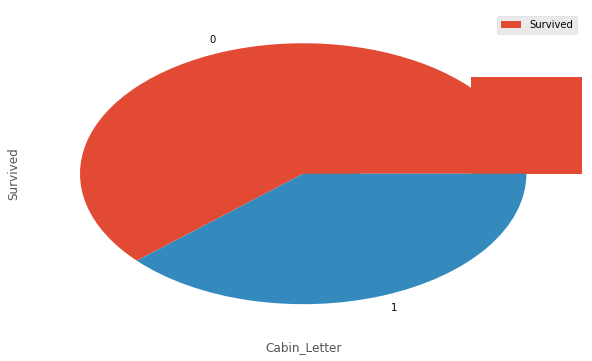

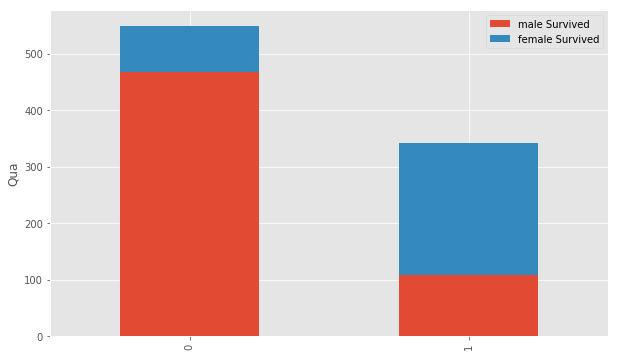

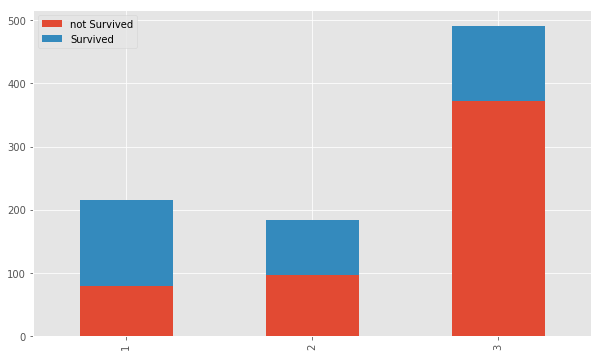

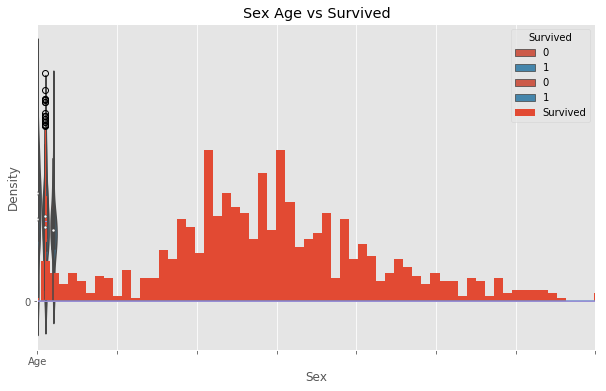

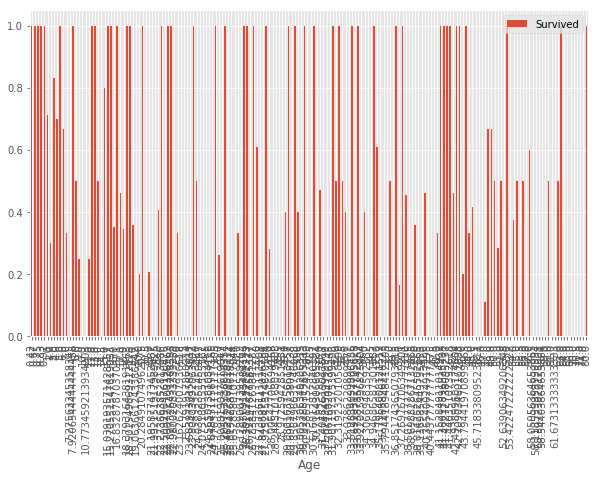

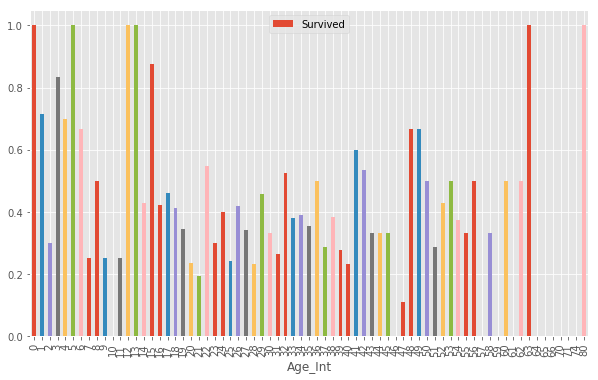

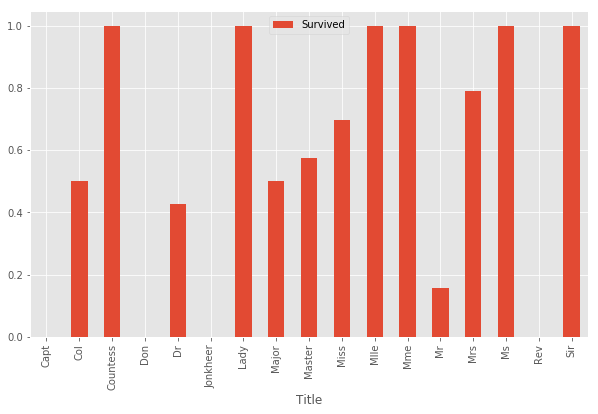

In [97]:
train_data2[['Title','Survived']].groupby('Title').mean().plot(kind='bar')
plt.show()

In [98]:
train_data2['Name_Len']=train_data2.Name.apply(lambda x:len(x))


In [99]:
train_data2[['Name_Len','Survived']].groupby('Name_Len').mean().plot(kind='bar')
# plt.show()

In [100]:
plt.subplot(121)
train_data2.Survived[train_data2.SibSp>0].value_counts().plot(kind='pie')
plt.subplot(122)
train_data2.Survived[train_data2.SibSp==0].value_counts().plot(kind='pie')
# plt.show()

In [101]:
plt.subplot(121)
train_data2.Survived[train_data2.Parch>0].value_counts().plot(kind='pie')
plt.subplot(122)
train_data2.Survived[train_data2.Parch==0].value_counts().plot(kind='pie')
# plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [102]:
train_data2[['Parch','Survived']].groupby('Parch').mean().plot(kind='bar')
# plt.show()

In [103]:
train_data2[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [104]:
train_data2[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [105]:
train_data2['Family_Size']=train_data2['Parch']+train_data2.SibSp+1
train_data2[['Family_Size','Survived']].groupby('Family_Size').mean()

,Survived
Family_Size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [106]:
train_data2['Fare'].hist(bins=70)
# plt.show()

In [107]:
# train_data2[['Pclass','Fare']].groupby('Pclass')
train_data2.boxplot(column='Fare',by='Pclass')#,showfliers=False)
# plt.show()

In [108]:
fare_not_survived=train_data2.Fare[train_data2.Survived ==0]
fare_survived=train_data2.Fare[train_data2.Survived ==1]

In [109]:
fare_not_survived.mean()

22.117886885245877

In [110]:
fare_survived.mean()

48.39540760233917

In [111]:
fare_not_survived.std()

31.388206530563984

In [112]:
fare_survived.std()

66.59699811829472

In [113]:
average_fare=pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare=pd.DataFrame([fare_not_survived.std(),fare_survived.std()])
average_fare.plot(yerr=std_fare,kind='bar')
# plt.show()

In [114]:
average_fare.plot(kind='bar')
# plt.show()

In [115]:
train_data2['Has_Cabin']=train_data2.Cabin.apply(lambda x:0 if x=='U0' else 1)
train_data2[['Survived','Has_Cabin']].groupby('Has_Cabin').mean().plot(kind='bar')
# plt.show()

In [116]:
train_data2[train_data2.Cabin !='U0'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Int,Age_group,Title,Name_Len,Family_Size,Has_Cabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38,"(18, 65]",Mrs,51,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35,"(18, 65]",Mrs,44,2,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54,"(18, 65]",Mr,23,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,4,"(0, 12]",Miss,31,3,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,58,"(18, 65]",Miss,24,1,1


In [117]:
train_data2['Cabin_Letter']=train_data2.Cabin.str.extract('([A-Za-a]+)')
train_data2.Cabin_Letter.head()

0    U
1    C
2    U
3    C
4    U
Name: Cabin_Letter, dtype: object

In [118]:
train_data2.Cabin_Letter[train_data2.Survived==1].value_counts().plot(kind='bar')
# plt.show()

In [119]:
train_data2[['Cabin_Letter','Survived']].groupby('Cabin_Letter').mean().plot(kind='bar')
# plt.show()